<a href="https://colab.research.google.com/github/nxxk23/bsc_dpdm22/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Describes
- [Bank Marketing Campaign Dataset](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)



```
# - A. Attributes Description:`
Input variables:

- Ai. bank client data:
1.  age: (numeric)
2.  job: type of job (categorical: 'admin.','blue-collar','entrepreneur', 'housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.   marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education: (categorical: primary, secondary, tertiary and unknown)
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')
8.  balance: Balance of the individual.

- Aii. Related with the last contact of the current campaign:
8   contact: contact communication type (categorical: 'cellular','telephone')
9   month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10   day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11   duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- Aiii. other attributes:
12   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13   pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14   previous: number of contacts performed before this campaign and for this client (numeric)
15   poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
21   y - has the client subscribed a term deposit? (binary: 'yes','no')
```




In [2]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DPDM/Project/bank.csv')

In [4]:
class EDA:
    
    def row(self,data):
        fig = make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
        fig.show()
    
    def border_msg(self,msg, indent=1, width=None, title=None):
        """Print message-box with optional title."""
        lines = msg.split('\n')
        space = " " * indent
        if not width:
            width = max(map(len, lines))
        box = f'╔{"═" * (width + indent * 2)}╗\n'  
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'  
            box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  
        box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
        box += f'╚{"═" * (width + indent * 2)}╝' 
        print('\033[92m'+'\033[1m')
        print(box)
        
    def distribution(self,x,title):
        plt.figure(figsize=(10,8))
        ax = sns.distplot(x, kde=False,bins=30)
        values = np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(), values.max())
        colors = plt.cm.jet(norm(values))
        for rec, col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title, size=20, color='black')
        
    def run(self,df):
        
        self.row(df)
        if len(df)>0:
            
            object_df = df.select_dtypes('object').columns.tolist()
            int_df = df.select_dtypes('int').columns.tolist()
            bool_df = df.select_dtypes('bool').columns.tolist()
            float_df = df.select_dtypes('float').columns.tolist()

            if len(object_df)>0:
                
                print( '\033[1m'+"OBJECT TYPE")
                for col in object_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('There are {} unique values in {} column'.format(df[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()

                     
            if len(int_df)>0:
                
                print('\033[1m'+"INT TYPE")
                for col in int_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('Average value is : {}'.format(df[col].mean()))
                    self.border_msg('Minumum value is : {}'.format(df[col].min()))
                    self.border_msg('Maximum value is : {}'.format(df[col].max()))
                    self.distribution(df[col],title=col)
                    if df[col].mean()>df[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))
                        
                    elif df[col].mean()<df[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")
                        
                    fig = make_subplots(rows=1, cols=2)
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].mean(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "📌 Mean<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].std(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🖇 Standart dev<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
                    fig.show()
                    plt.show()
                 

            if len(bool_df)>0:
                
                print('\033[1m'+"BOOL TYPE")
                for col in bool_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(float_df)>0:
                
                print('\033[1m'+"FLOAT TYPE")
                for col in float_df:
                    for col in int_df:
                        self.distribution(df[col],title=col)
                        if df[col].mean()>df[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))
                        
                        elif df[col].mean()<df[col].std():
                            print(self.border_msg("Normal distributed Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals Std Dev - Distribution is normal")                   

OBJECT TYPE

╔═══════════════════════════════════════════════════════╗
║                          JOB                          ║
╚═══════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 12 unique values in JOB column ║
╚══════════════════════════════════════════╝


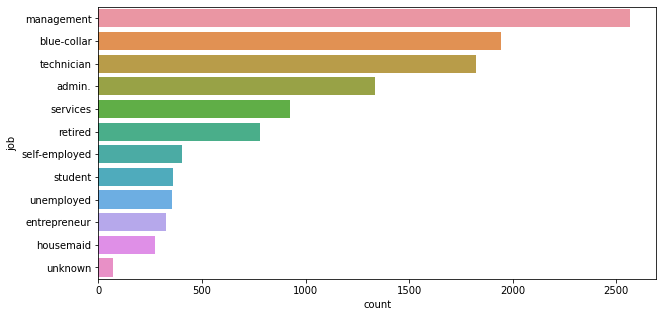


╔═══════════════════════════════════════════════════════════╗
║                          MARITAL                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in MARITAL column ║
╚═════════════════════════════════════════════╝


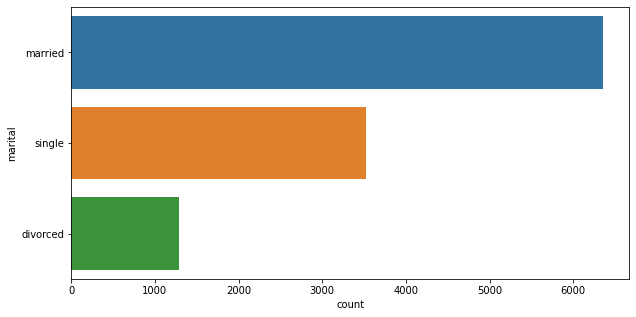


╔═════════════════════════════════════════════════════════════╗
║                          EDUCATION                          ║
╚═════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════════════╗
║ There are 4 unique values in EDUCATION column ║
╚═══════════════════════════════════════════════╝


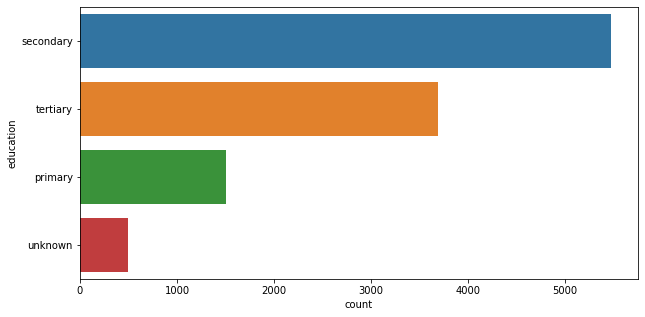


╔═══════════════════════════════════════════════════════════╗
║                          DEFAULT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEFAULT column ║
╚═════════════════════════════════════════════╝


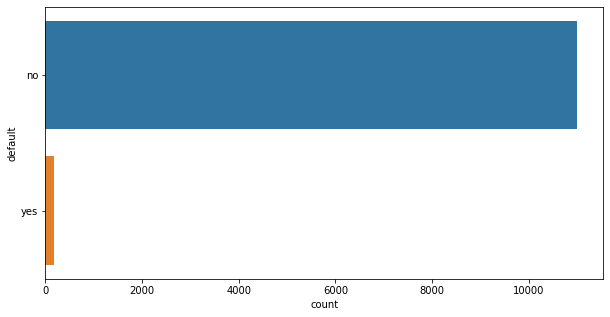


╔═══════════════════════════════════════════════════════════╗
║                          HOUSING                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in HOUSING column ║
╚═════════════════════════════════════════════╝


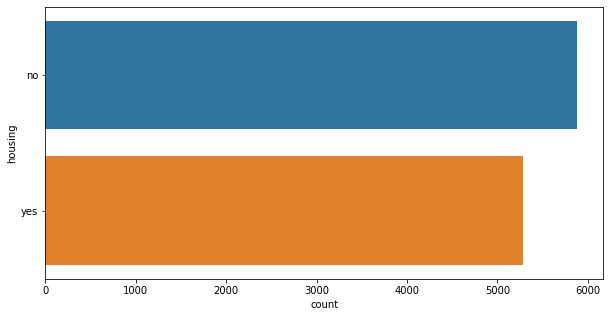


╔════════════════════════════════════════════════════════╗
║                          LOAN                          ║
╚════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 2 unique values in LOAN column ║
╚══════════════════════════════════════════╝


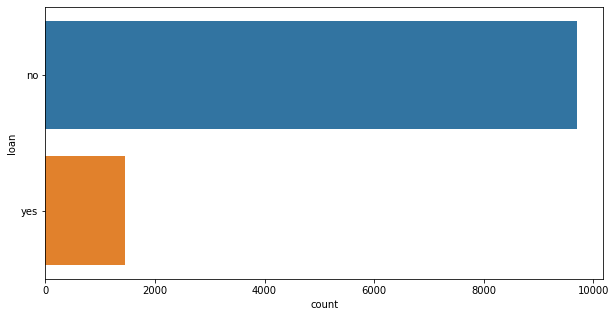


╔═══════════════════════════════════════════════════════════╗
║                          CONTACT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in CONTACT column ║
╚═════════════════════════════════════════════╝


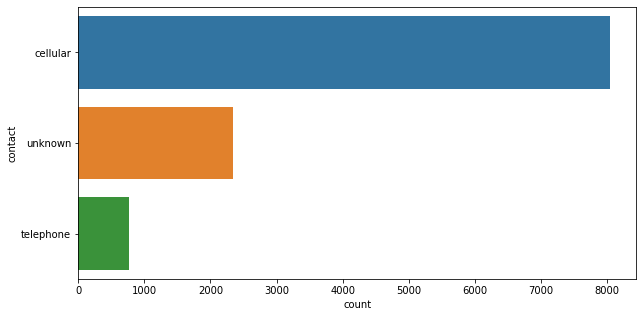


╔═════════════════════════════════════════════════════════╗
║                          MONTH                          ║
╚═════════════════════════════════════════════════════════╝

╔════════════════════════════════════════════╗
║ There are 12 unique values in MONTH column ║
╚════════════════════════════════════════════╝


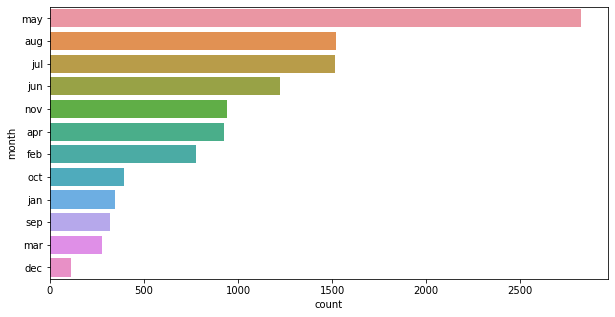


╔════════════════════════════════════════════════════════════╗
║                          POUTCOME                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════╗
║ There are 4 unique values in POUTCOME column ║
╚══════════════════════════════════════════════╝


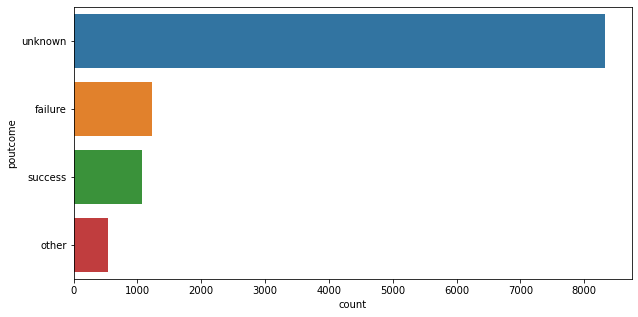


╔═══════════════════════════════════════════════════════════╗
║                          DEPOSIT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEPOSIT column ║
╚═════════════════════════════════════════════╝


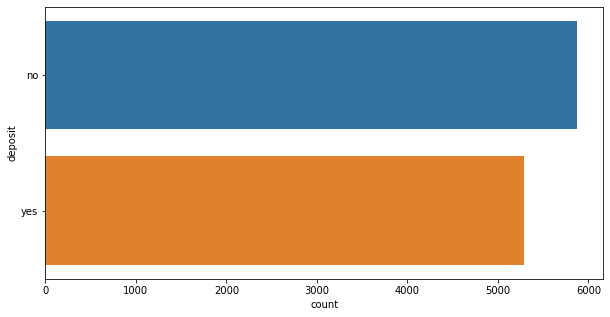

INT TYPE

╔═══════════════════════════════════════════════════════╗
║                          AGE                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 41.231947679627304 ║
╚═══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : 18 ║
╚═══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 95 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


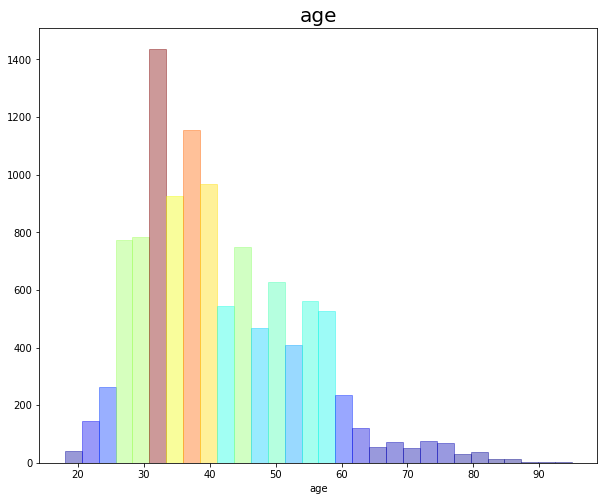


╔═══════════════════════════════════════════════════════════╗
║                          BALANCE                          ║
╚═══════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 1528.5385235620856 ║
╚═══════════════════════════════════════╝

╔══════════════════════════╗
║ Minumum value is : -6847 ║
╚══════════════════════════╝

╔══════════════════════════╗
║ Maximum value is : 81204 ║
╚══════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


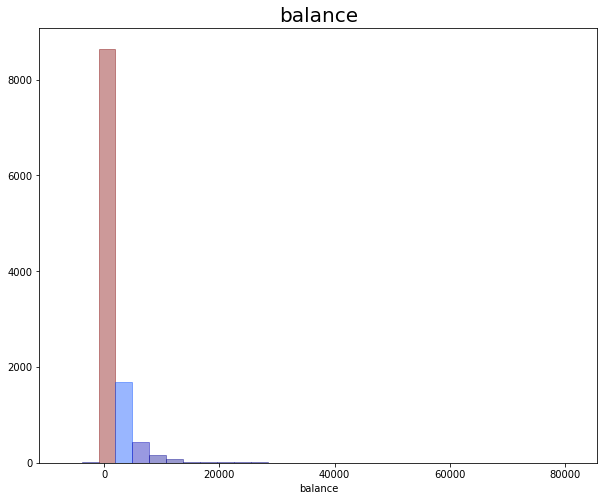


╔═══════════════════════════════════════════════════════╗
║                          DAY                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 15.658036194230425 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 31 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


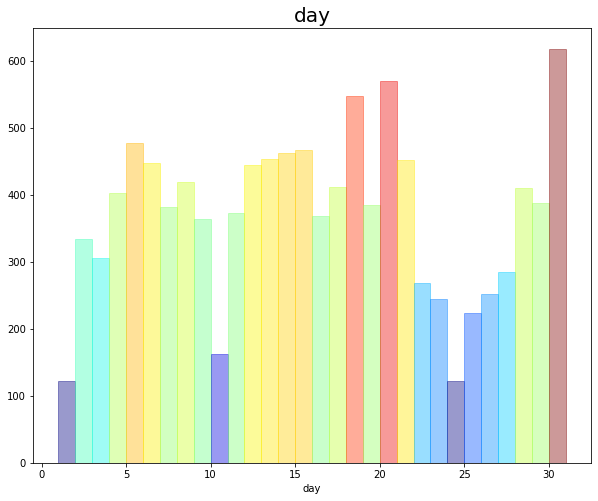


╔════════════════════════════════════════════════════════════╗
║                          DURATION                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 371.99381831213043 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 2 ║
╚══════════════════════╝

╔═════════════════════════╗
║ Maximum value is : 3881 ║
╚═════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


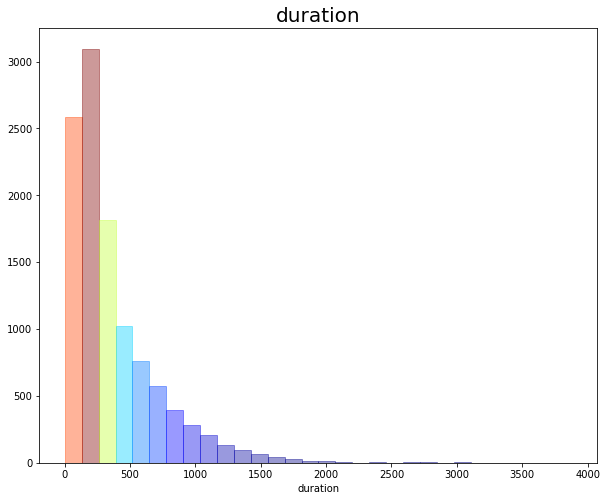


╔════════════════════════════════════════════════════════════╗
║                          CAMPAIGN                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 2.508421429851281 ║
╚══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 63 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


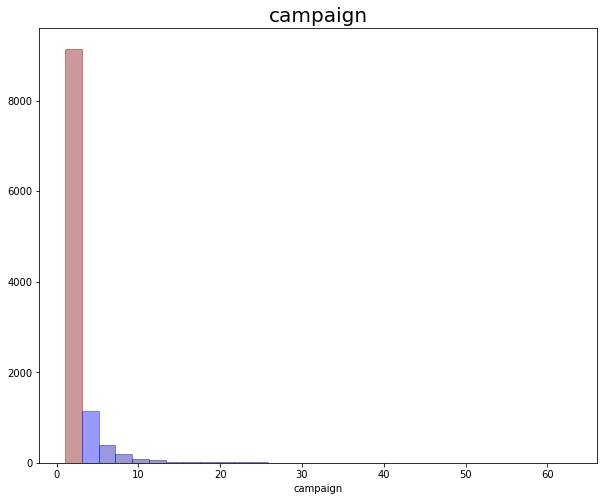


╔═════════════════════════════════════════════════════════╗
║                          PDAYS                          ║
╚═════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 51.33040673714388 ║
╚══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : -1 ║
╚═══════════════════════╝

╔════════════════════════╗
║ Maximum value is : 854 ║
╚════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


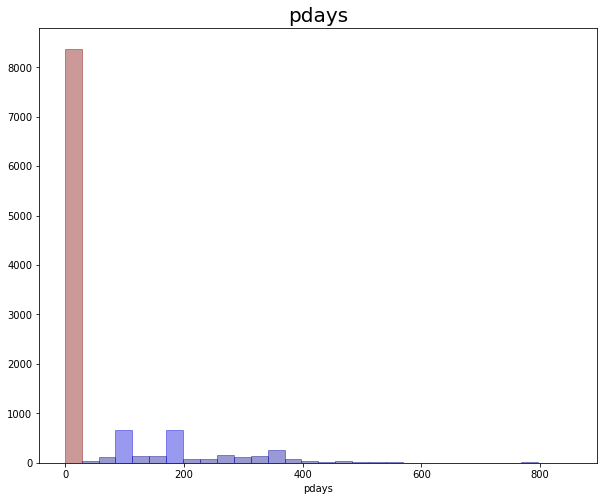


╔════════════════════════════════════════════════════════════╗
║                          PREVIOUS                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 0.8325568894463358 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 0 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 58 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


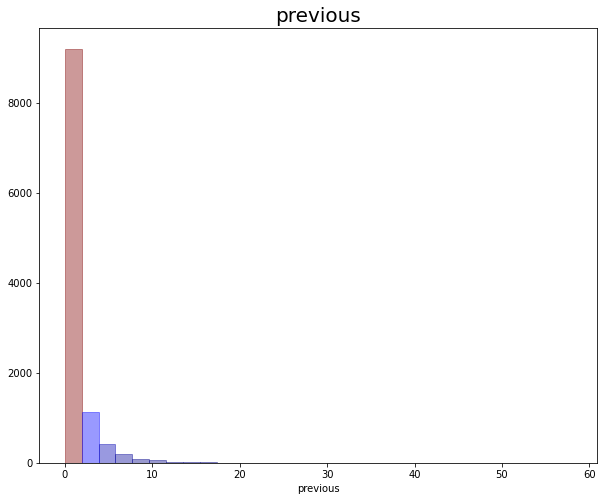

In [5]:
frame = EDA().run(df)

# Data Pre-Processing


## Import Data

In [6]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')
#import data
df = pd.read_csv('/content/drive/MyDrive/DPDM/Project/bank.csv')
term_deposits = df.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no




```
As the data information said it will be better to drop **the duration column** เนื่องจากระยะเวลามีความสัมพันธ์ต่อผลลัพธ์ที่ว่าว่าลูกค้าจะซื้อเงินฝากระยะยาวหรือไม่ 
นอกจากนี้คอลัมน์นี้ยังนับเวลาของลูกค้าที่โทรไปแต่ไม่รับสาย ดังนั้น คอลัมน์นี้ก็ไม่มีประโยชน์ 
เหตุผลที่ระยะเวลามีความสัมพันธ์อย่างมากกับการเปิดเงินฝากประจำ เนื่องจากยิ่งธนาคารพูดคุยกับลูกค้าเป้าหมายมากเท่าใด ความน่าจะเป็นที่ลูกค้าเป้าหมายจะเปิดเงินฝากประจำก็จะยิ่งสูงขึ้น 
เนื่องจากระยะเวลาที่สูงขึ้นหมายถึง higher interest (commitment)ที่สูงขึ้นจากลูกค้า
```



In [7]:
# Drop 'duration' column
df_bank = df.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()

Shape of dataframe: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


## Class Distribution
class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

In [8]:
df_bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

###Information on Term Suscriptions



```
สัดส่วนของคนที่สมัครและไม่ได้สมัครรับ Term of suscriptions จำแนกตาม level of garduate และ state of loans
```


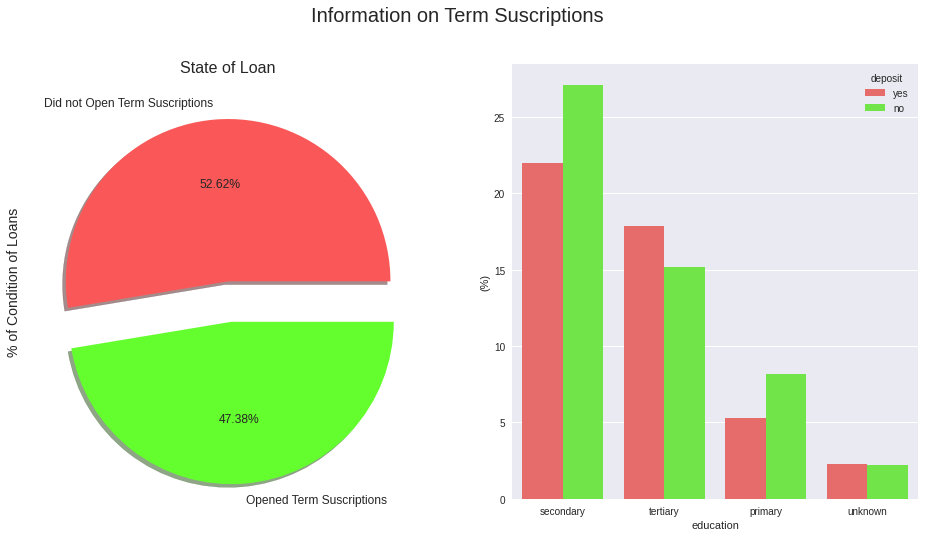

In [9]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"
plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, labels=labels, colors=colors, fontsize=12)

ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=colors, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

###Categorical Features

In [10]:
# Notice how divorced have a considerably low amount of balance.
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [11]:
fig = ff.create_facet_grid(df, y='balance', facet_row='marital', facet_col='deposit', trace_type='box')

iplot(fig, filename='facet - box traces')

In [12]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values

ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)
fig = go.Figure(data=traces, layout=layout)
iplot(fig)

## Missing Values
No missing values.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#**Classification**

###Numeruic Features
```
how the numeric data is distributed.
```



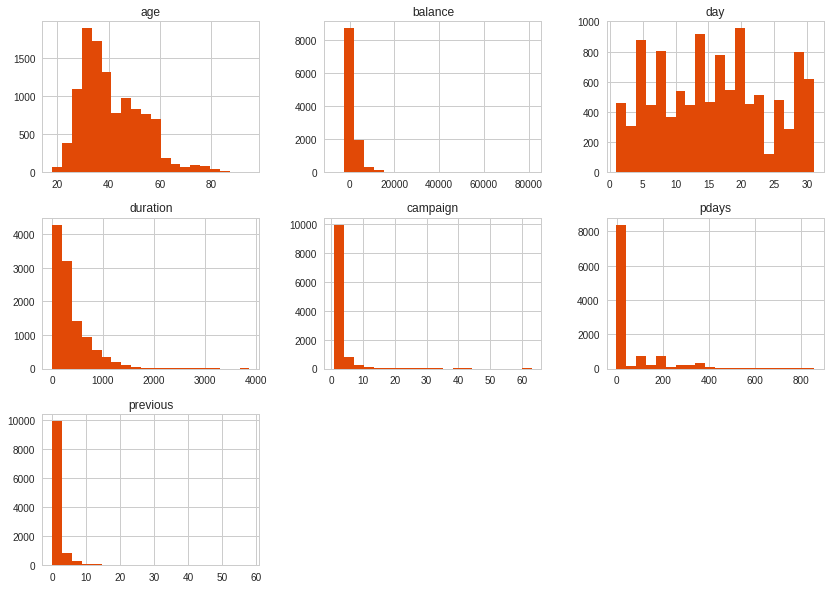

In [14]:
#how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show();

## Scale Numeric Data

Next up, we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data.

In [15]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])

df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,-0.186785,-0.481184,-0.36326,unknown,yes


## Encode Categorical Value

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use `OneHotEncoder()` provided by sklearn. Basically it will transform a categorical column from this:

| marital | housing |
|----------|---------|
| single   | yes     |
| divorced | no      |
| married  | no      |

...into something like this...

| marital_single | marital_divorced | marital_married | housing_yes | housing_no |
|----------------|------------------|-----------------|-------------|------------|
| 1              | 0                | 0               | 1           | 0          |
| 0              | 1                | 0               | 0           | 1          |
| 0              | 0                | 1               | 0           | 1          |

In this code cell we will also encode our label column by replacing 'yes' and 'no' with 1 and 0 respectively. We can do this by applying simple lambda/in-line function on the column.

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = df_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)
df_bank_ready.head()

Shape of dataframe: (11162, 51)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,1


## Split Dataset for Training and Testing

we will split the data with ratio of 80:20 for training and testing respectively. 

In [17]:
# Select Features
feature = df_bank_ready.drop('deposit', axis=1)

# Select Target
target = df_bank_ready['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=7)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


## Modelling

After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 4 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default paramaeters set by sklearn and after building all 4 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.

<div align='center'><img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' height='250'></div>
where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes

In this case we want to focus on the recall value of our model because in our problem we should try to predict as many actual positive as we can. Because a misclassification of customer who **actually** wanted to make a deposit can mean a lose opportunity/revenue.

Below we will define a helper function to evaluate each trained model and with the metrics mentioned above and save the score to a variable.

## Decision Tree

In [18]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, and f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Building Model

In [19]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=7)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

### Model Evaluation

In [20]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6345723242274967
Precision: 0.60543580131209
Recall: 0.6205571565802114
F1 Score: 0.6129032258064517
Area Under Curve: 0.6336846185585621
Confusion Matrix:
 [[771 421]
 [395 646]]


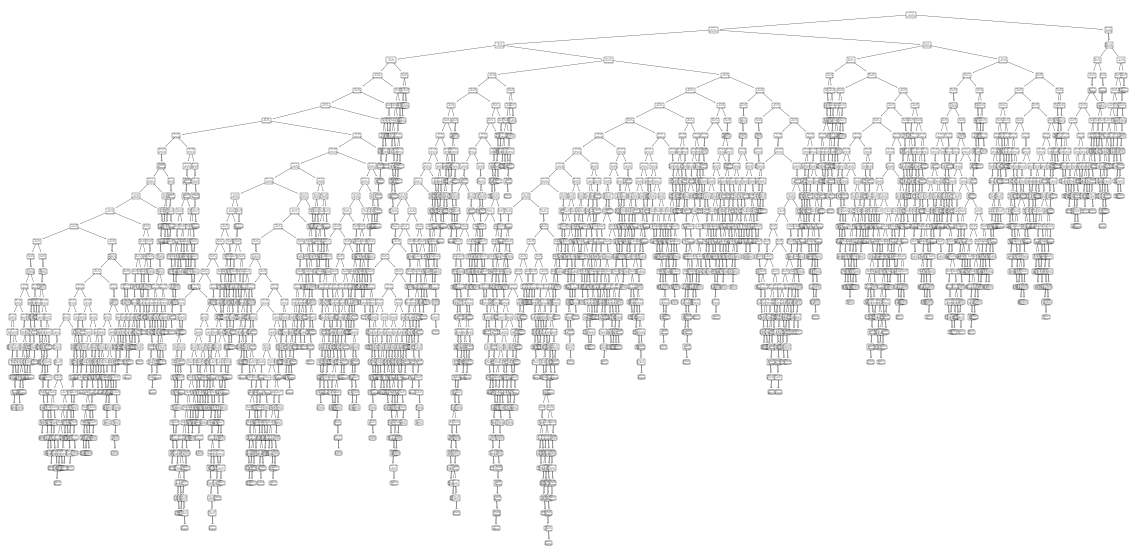

In [21]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dtc, ax=ax)
plt.show()

## Naive Bayes

### Building Model

In [22]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Model Evaluation

In [23]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6860725481415136
Precision: 0.7407932011331445
Recall: 0.5024015369836695
F1 Score: 0.5987406983400114
Area Under Curve: 0.7370671592235138
Confusion Matrix:
 [[1009  183]
 [ 518  523]]


## K-Nearest Neighbors

### Building Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [25]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.6941334527541424
Precision: 0.6954148471615721
Recall: 0.611911623439001
F1 Score: 0.6509964230965765
Area Under Curve: 0.7311072374910548
Confusion Matrix:
 [[913 279]
 [404 637]]


## Model Comparison


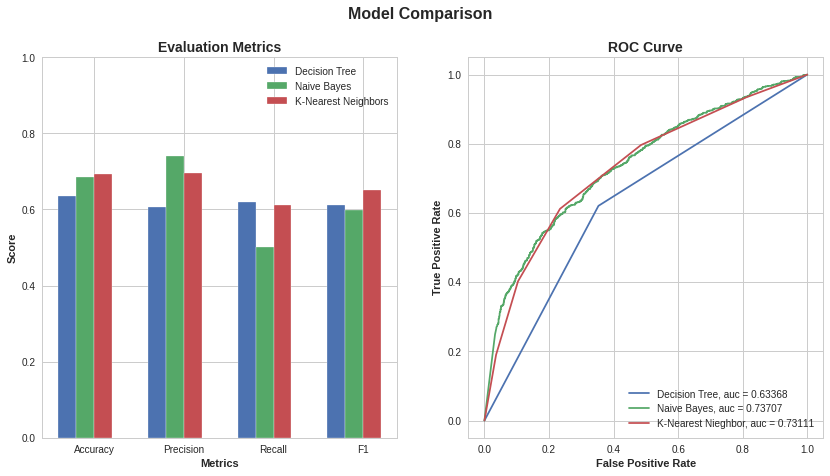

In [26]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

#**Naive Bayes Model Winning!**
From the figures above we can see that our Naive Bayes model tops the other models. So we can assume that Naive Bayes is the right choice to solve our problem.

## Prediction

we will predict the expected outcome of all the row from our dataset

In [27]:
df_bank['deposit_prediction'] = nb.predict(feature)
df_bank['deposit_prediction'] = df_bank['deposit_prediction'].apply(lambda x: 'yes' if x==0 else 'no')

# Save new dataframe into csv file
df_bank.to_csv('deposit_prediction.csv', index=False)

df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,deposit_prediction
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no,yes
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no,yes
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no,yes
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no,yes


##Confusion Matrix:
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.


**Positive/Negative**: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


- **True Negatives** (Top-Left Square): This is the number of correctly classifications of the "No" class or potenial clients that are not willing to suscribe a term deposit.


- **False Negatives** (Top-Right Square): This is the number of incorrectly classifications of the "No" class or potential clients that are not willing to suscribe a term depositt.


- **False Positives** (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" class or potential clients that are willing to suscribe a term deposit.


- **True Positives** (Bottom-Right Square): This is the number of correctly classifications of the "Yes" class or potenial clients that are willing to suscribe a term deposit.

###**KNN**

In [28]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

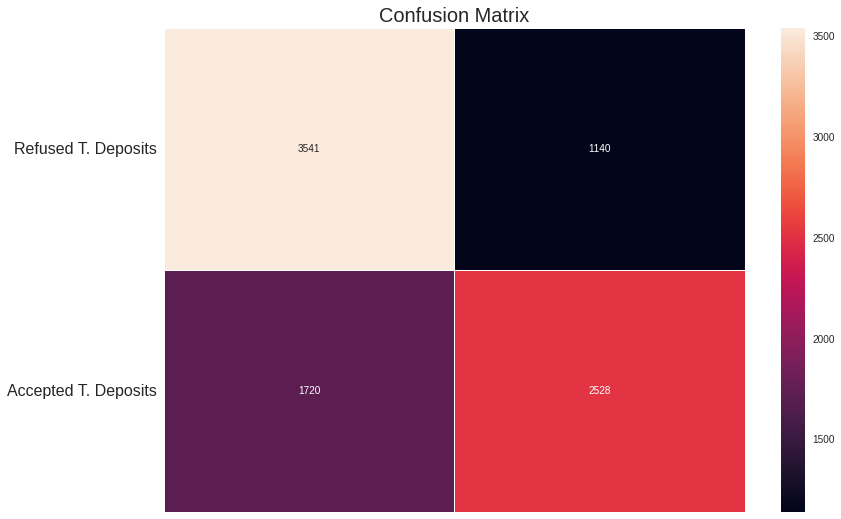

In [29]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

###**DT**

In [30]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)

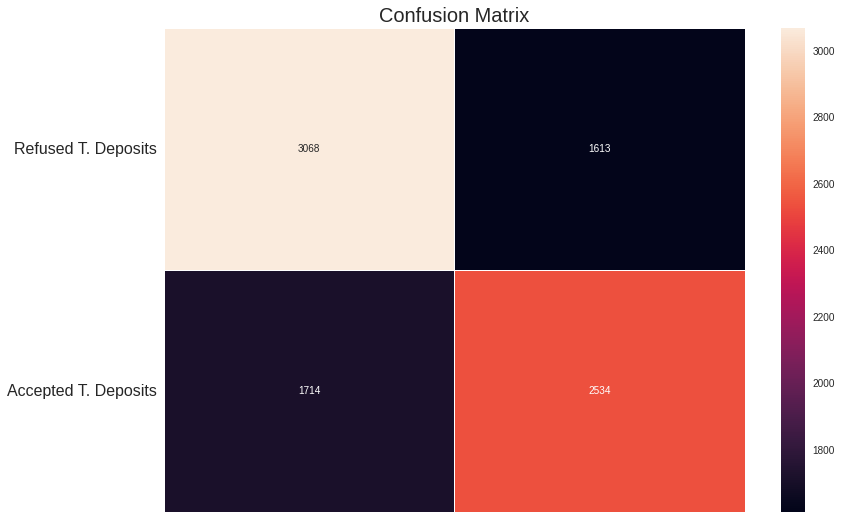

In [31]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

###**NB**

In [32]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(nb, X_train, y_train, cv=3)

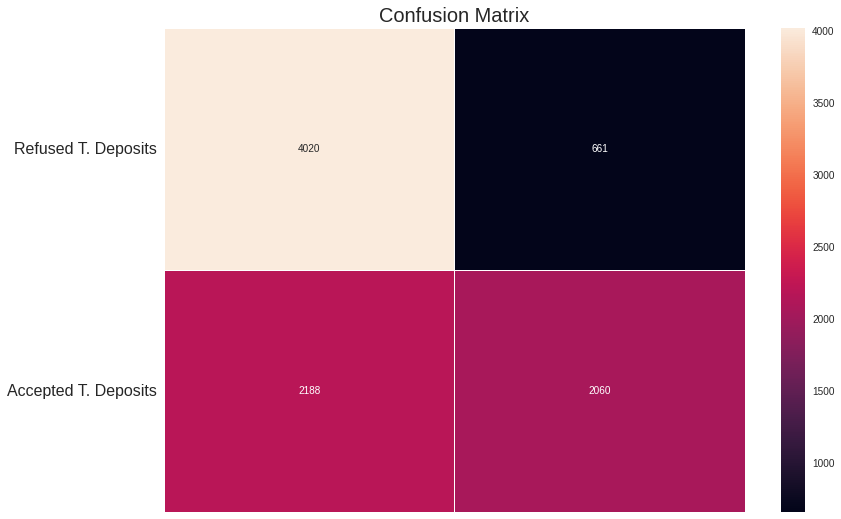

In [33]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

##**DecisionTree Implementation:**

```
The top three most important features for our classifier are 
- ระยะเวลา (ระยะเวลาที่ใช้ในการสนทนาระหว่างตัวแทนขายและผู้มีโอกาสเป็นลูกค้า)
- ผู้ติดต่อ (จำนวนผู้ติดต่อกับผู้มีโอกาสเป็นลูกค้าภายในแคมเปญการตลาดเดียวกัน
- เดือน (เดือน ของปี)
```


```
คุณสมบัติใดที่มีอิทธิพลต่อผลลัพธ์ของการสมัครสมาชิกแบบฝากประจำ?
```



Feature ranking:
1. feature 11 (0.591310)
2. feature 8 (0.129966)
3. feature 6 (0.067020)
4. feature 13 (0.049923)
5. feature 15 (0.038138)
6. feature 14 (0.037830)
7. feature 10 (0.026646)
8. feature 5 (0.025842)
9. feature 0 (0.017757)
10. feature 12 (0.007889)
11. feature 3 (0.005280)
12. feature 9 (0.002200)
13. feature 2 (0.000147)
14. feature 1 (0.000050)
15. feature 7 (0.000000)
16. feature 4 (0.000000)


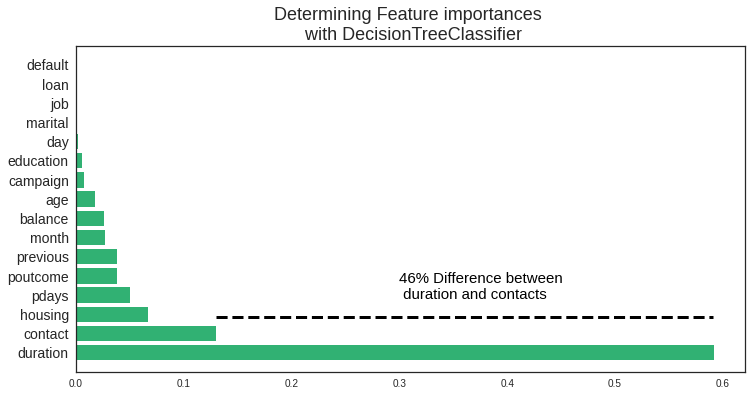

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'deposit'
X = term_deposits.drop('deposit', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

#**Clustering Marital Status and Education:**

```
- Marital Status: the impact of a divorce has a significant impact on the balance of the individual.

- Education: The level of education also has a significant impact on the amount of balance a prospect has.

- Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance them has.
```



In [35]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [36]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,married/secondary
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,married/secondary
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,married/tertiary


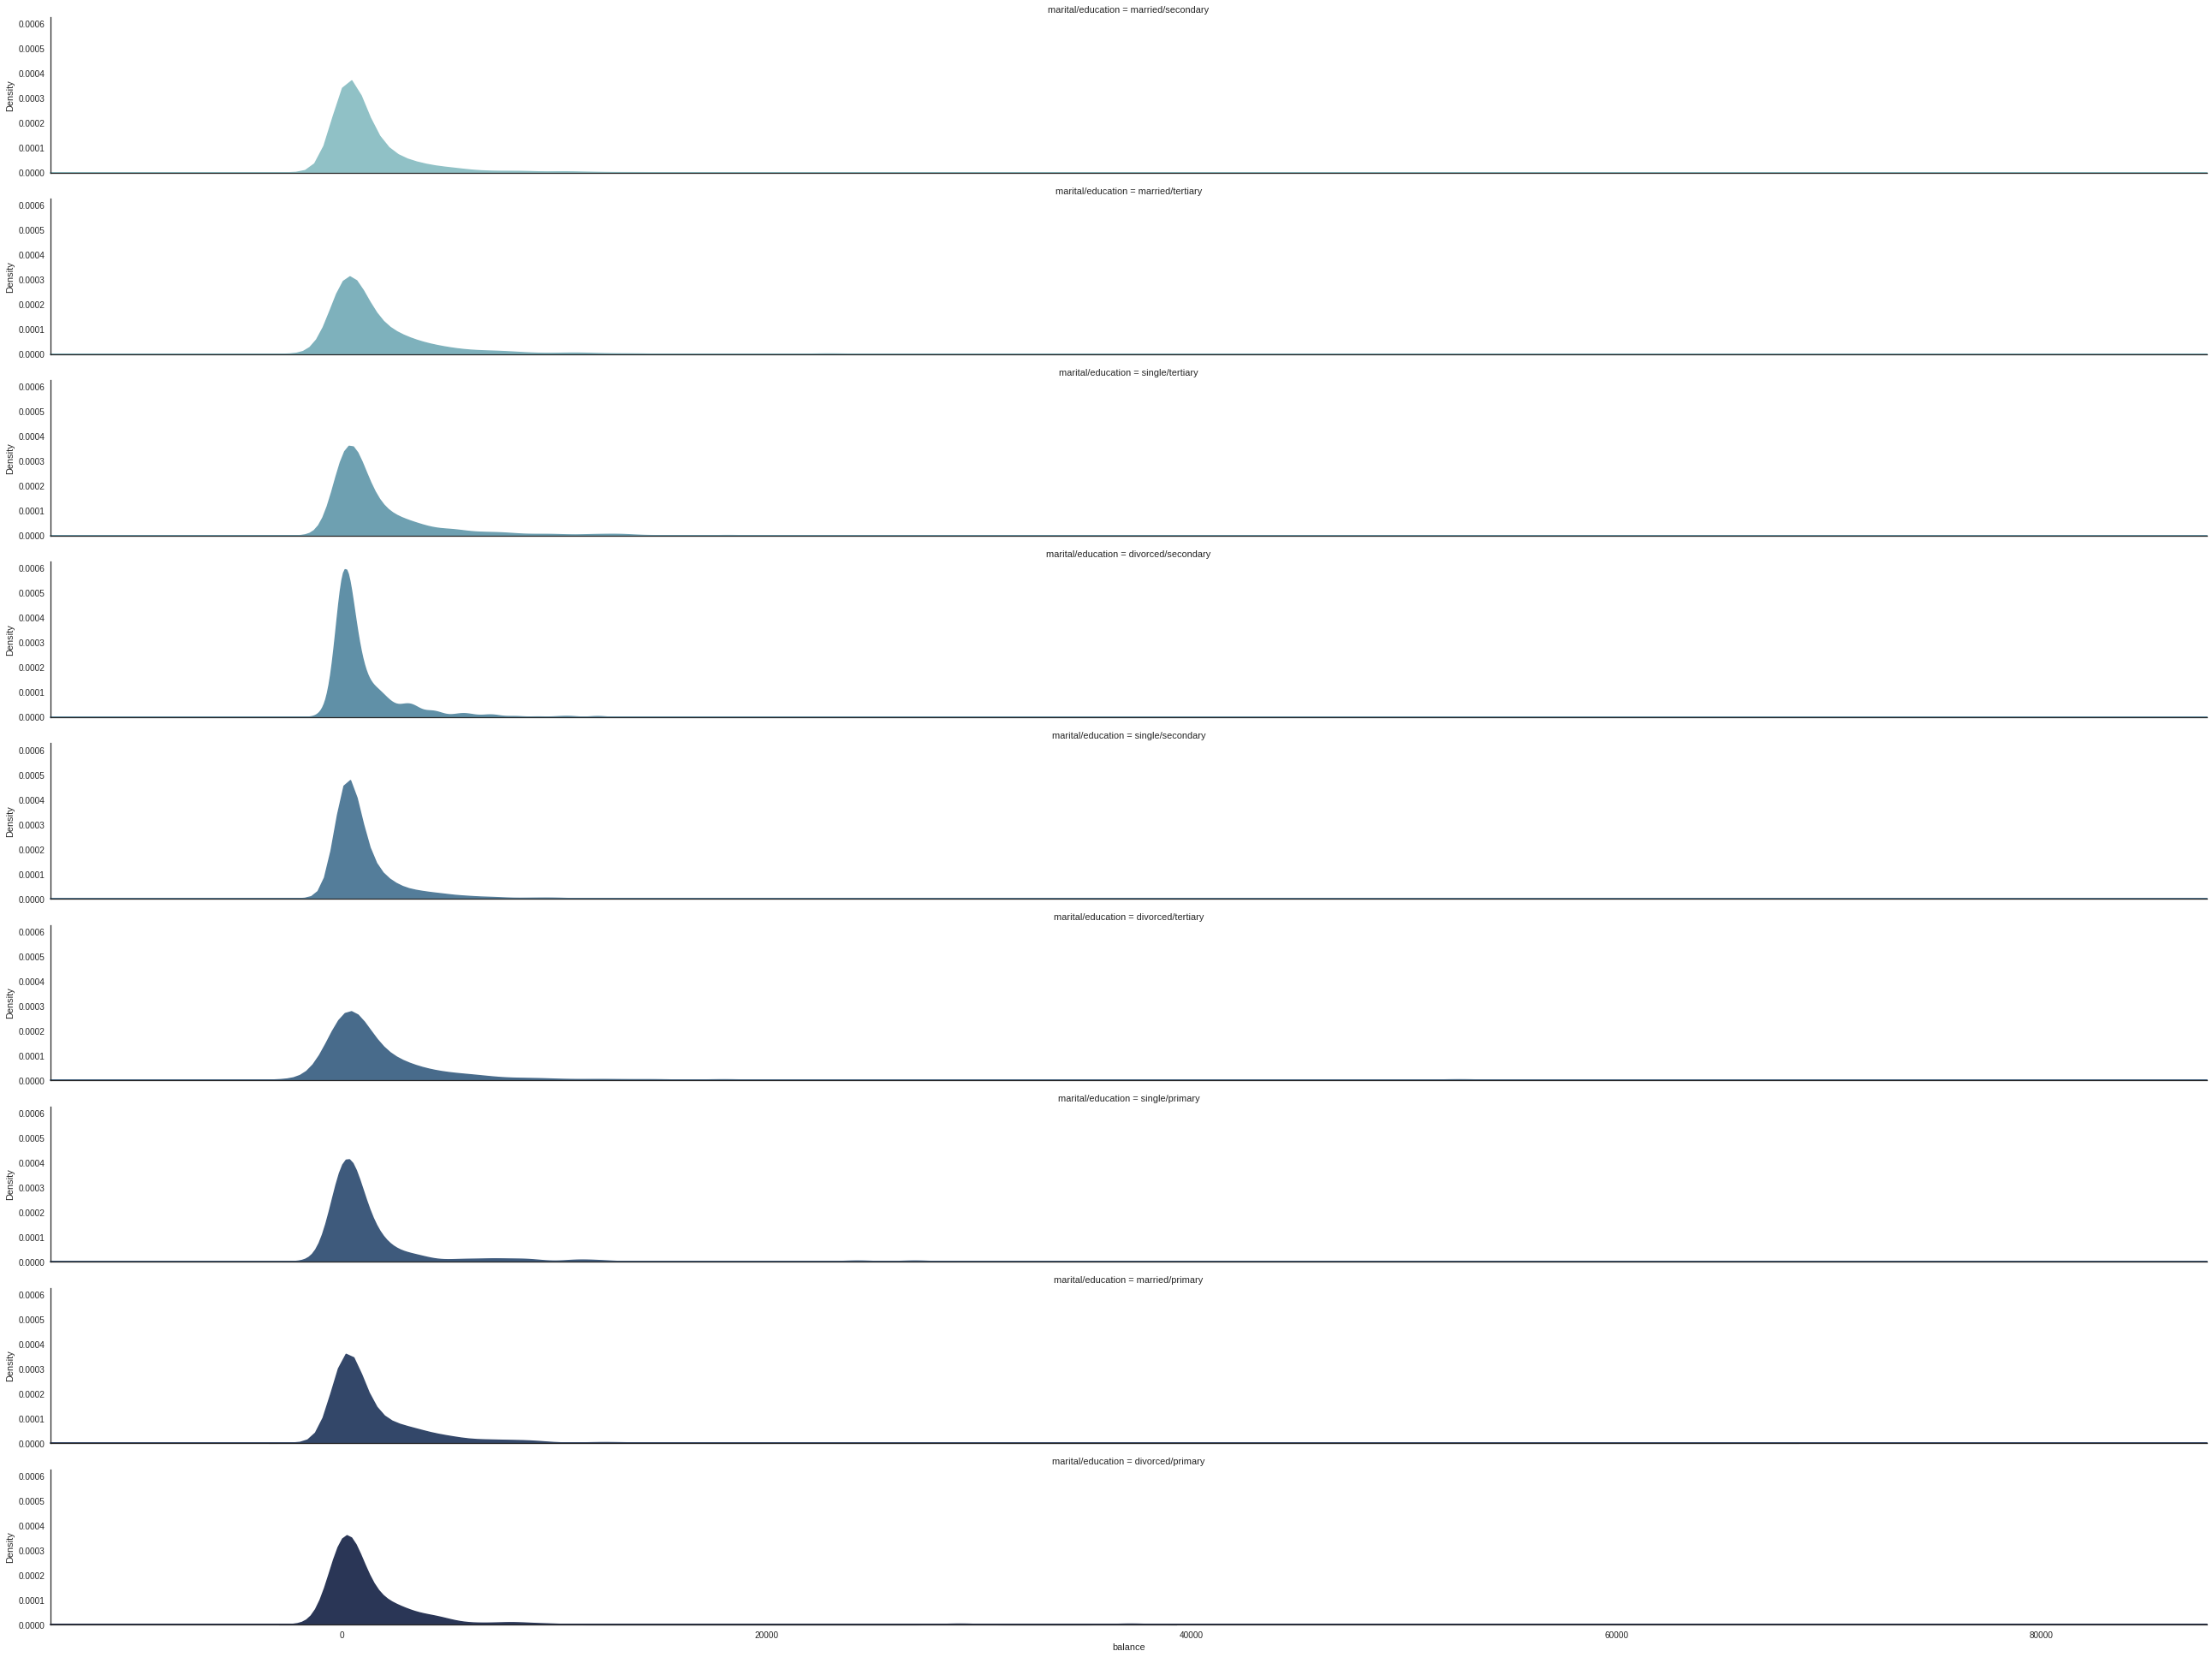

In [37]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

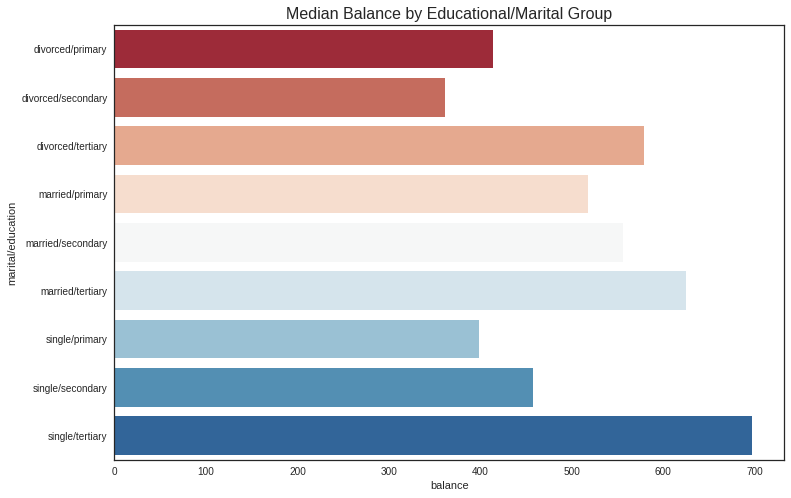

In [38]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [39]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

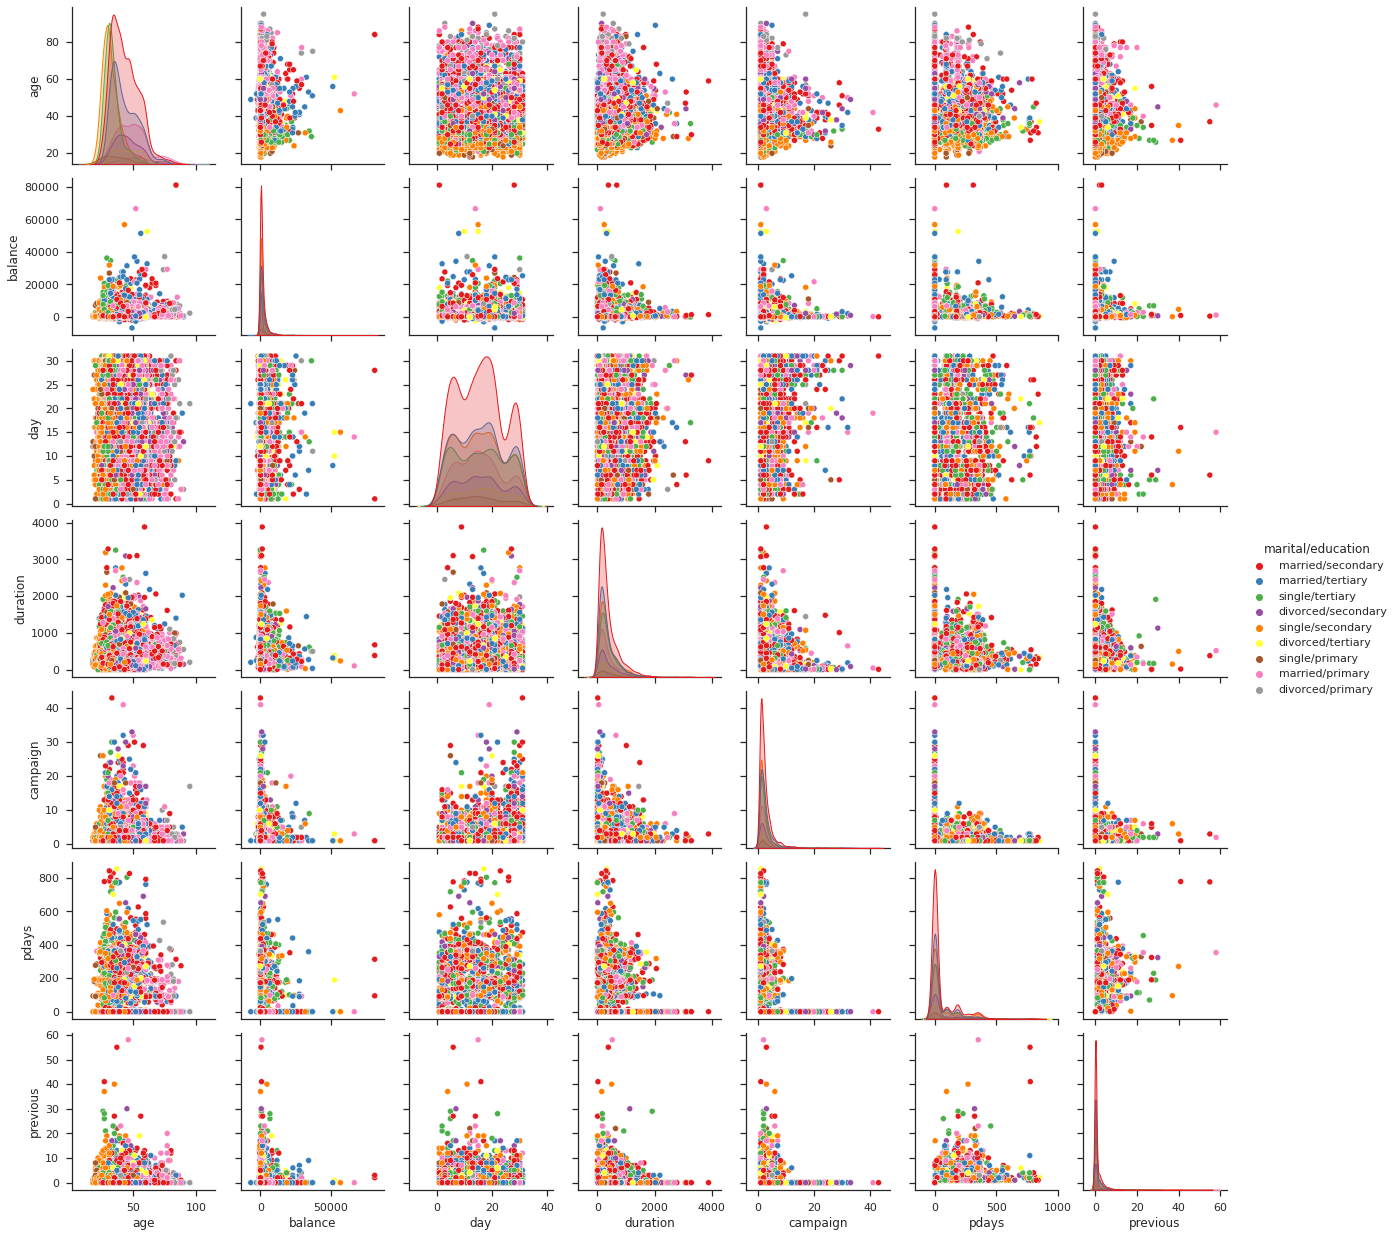

In [40]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

## Data Correlation

In [41]:
data = term_deposits

In [42]:
data['deposit'].mask(data['deposit'] == 'no', 0 , inplace=True)
data['deposit'].mask(data['deposit'] == 'yes', 1 , inplace=True)
data['deposit']= data['deposit'].astype('float64')

In [43]:
### spliting data en X et Y
X= data.drop('deposit', axis=1)
Y= data['deposit']

<Axes: >

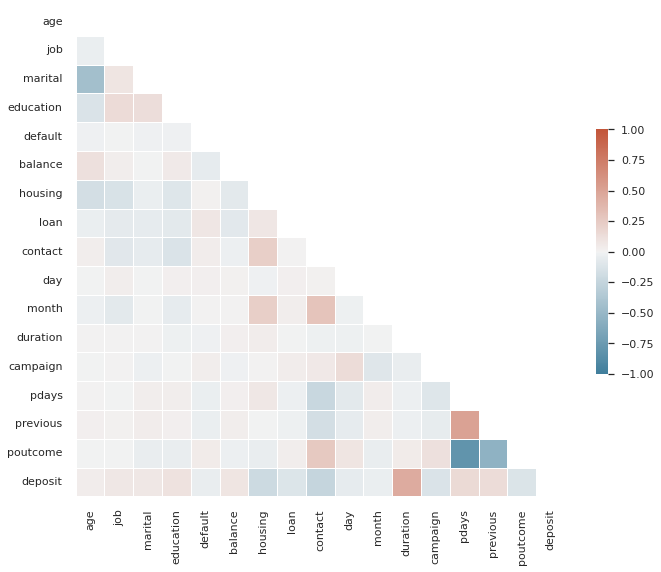

In [44]:
sns.set_theme(style="white")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
### spliting data en X et Y
X= data.drop('deposit', axis=1)
Y= data['deposit']

In [46]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
roc_values = []
cv = StratifiedKFold(n_splits=20)
for feature in X.columns:
    roc_temp_list = []
    X_= X[feature].copy()
    for train, test in cv.split(X_, Y):
        clf = DecisionTreeClassifier()
        clf.fit(X_.iloc[train].fillna(0).to_frame(), Y.iloc[train])
        y_scored = clf.predict_proba(X_.iloc[test].fillna(0).to_frame())
        roc_temp_list.append(roc_auc_score(Y.iloc[test], y_scored[:, 1]))
    roc_values.append(np.array(roc_temp_list).mean())

In [47]:
roc_table= pd.DataFrame({'features': X.columns, 'mean roc_auc_score': roc_values})
roc_table=roc_table.reset_index(drop=True)
roc_table=roc_table.sort_values(by=['mean roc_auc_score'], ascending=False)
roc_table

,features,mean roc_auc_score
11,duration,0.755922
15,poutcome,0.613191
8,contact,0.608725
6,housing,0.602040
14,previous,0.601202
1,job,0.592817
13,pdays,0.590600
5,balance,0.590259
0,age,0.586359
10,month,0.578887


# K mean

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('/content/drive/MyDrive/DPDM/Project/bank.csv')

In [51]:
X = pd.get_dummies(df)

In [52]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()
Sc_X= Sc.fit_transform(X)
from sklearn.cluster import KMeans
Mdl = KMeans(n_clusters=2)
Clus_Lbls= Mdl.fit_predict(Sc_X)
X['Cluster']=Clus_Lbls
X.corr()['Cluster'].sort_values()

pdays                 -0.823928
previous              -0.622149
poutcome_failure      -0.602424
poutcome_success      -0.558204
poutcome_other        -0.385201
contact_cellular      -0.258508
deposit_yes           -0.230470
month_sep             -0.134563
month_oct             -0.107772
month_feb             -0.083208
month_dec             -0.073023
month_apr             -0.066866
job_student           -0.060027
loan_no               -0.059783
education_tertiary    -0.055436
month_nov             -0.054318
default_no            -0.053554
balance               -0.046091
month_jan             -0.041197
month_mar             -0.039590
marital_single        -0.039051
job_retired           -0.037441
job_management        -0.036213
job_admin.            -0.031759
age                   -0.027021
housing_no            -0.024227
contact_telephone     -0.010811
job_unemployed        -0.008532
education_unknown     -0.004713
job_unknown           -0.003166
job_self-employed      0.005394
job_tech

<Axes: >

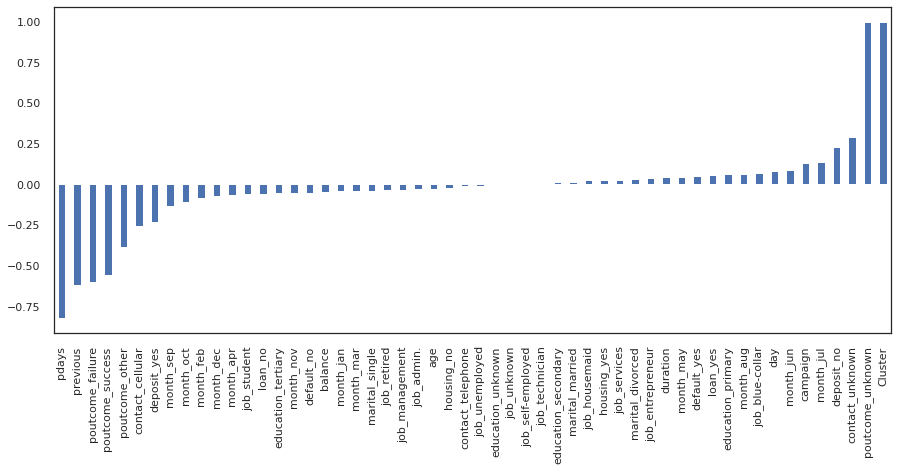

In [53]:
plt.figure(figsize=(15,6))
X.corr()['Cluster'].sort_values().plot(kind='bar')

In [54]:
ssd= []

for k in range (2, 10):
    Mdl=KMeans(n_clusters=k)
    
    Mdl.fit(Sc_X)
    
    ssd.append(Mdl.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

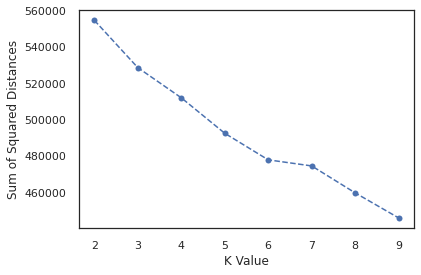

In [55]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

In [56]:
pd.Series(ssd).diff()

0             NaN
1   -26099.235684
2   -16626.316464
3   -19559.841356
4   -14650.406894
5    -3350.671008
6   -14852.630870
7   -13800.338478
dtype: float64

<Axes: >

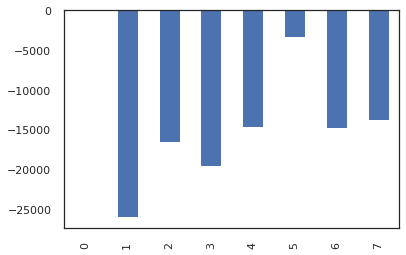

In [57]:
pd.Series(ssd).diff().plot(kind='bar')

#**Association**

###Data Transformation
Preparing data for association rule mining

In [65]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=5637482a4a79a14e39cfb6deaf1699145576a61c9fba1345fd9c9ea08422d334
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


Data Transaction

In [102]:
df_t = pd.read_csv('/content/drive/MyDrive/DPDM/Project/bank.csv')
df_t

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**AGE**

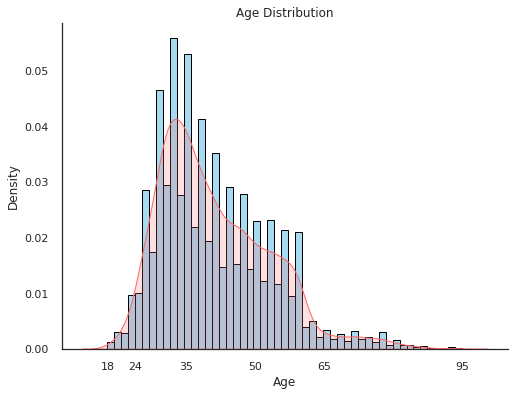

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a Pandas dataframe
bank_data = pd.read_csv("/content/drive/MyDrive/DPDM/Project/bank.csv")

# Create a histogram of the age distribution with a density curve
plt.figure(figsize=(8, 6))
sns.histplot(bank_data, x="age", stat="density", color="skyblue", edgecolor="black", linewidth=1)
sns.kdeplot(bank_data["age"], color="#FF6666", alpha=.2, fill=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.xticks([18,24,35,50,65,95])
sns.despine()
plt.show()

In [188]:
# Create age groups
bank_data['age'] = pd.cut(bank_data['age'], bins=[18,24,35,50,65,float('inf')], labels=['youth', 'young_adult', 'middle_aged_adult', 'senior_age', 'old'], include_lowest=True)


- **DEFAULT**
- **HOUSING**
- **LOAN**
- **DEPOSIT**
```
The fields that contained “YES” or “NO” like 
‘Default’, ’housing’, ’loan’, ‘deposit’ was transformed to “variable name = variable name = YES/NO” 
so that it would be clear in the rules what attribute is related to the YES or NO.
```



In [189]:
# Change variable names with yes/no/unknown
bank_data['default'] = bank_data['default'].replace({'no': 'default=no', 'yes': 'default=yes', 'unknown': 'default=unknown'})
bank_data['housing'] = bank_data['housing'].replace({'no': 'housing=no', 'yes': 'housing=yes', 'unknown': 'housing=unknown'})
bank_data['loan'] = bank_data['loan'].replace({'no': 'loan=no', 'yes': 'loan=yes', 'unknown': 'loan=unknown'})
bank_data['deposit'] = bank_data['deposit'].replace({'no': 'deposit=no', 'yes': 'deposit=yes'})

**BALANCE**

```
The data for bank balance was therefore put into four separate ranges. A histogram was used to check the distribution of the data and also considering the minimum and the maximum value. The four categories were: -$6847-$0, $0-$4000, and $4000-$81204.
```



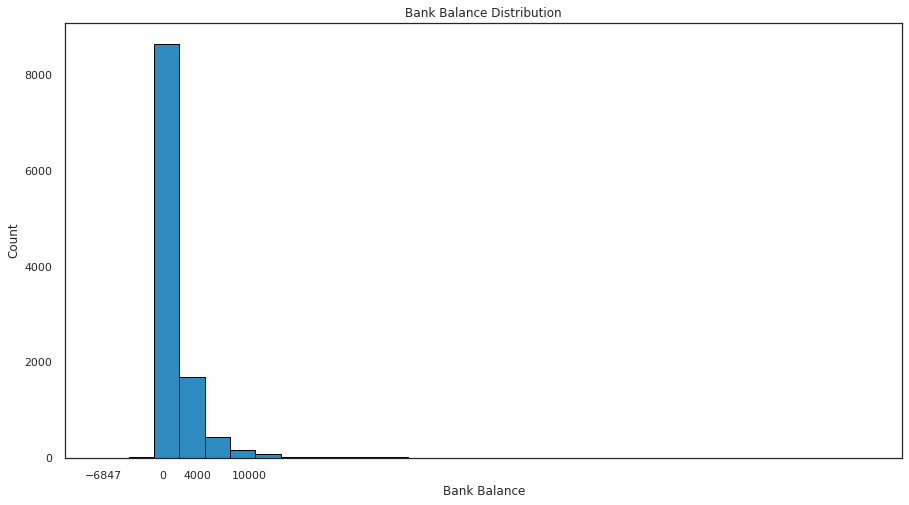

In [190]:
# Create histogram of bank balance distribution
fig, ax = plt.subplots(figsize=(15, 8))
plt.hist(bank_data['balance'], bins=30, color='#2E8BC0', edgecolor='black')

# Set x-axis labels and title
plt.xlabel('Bank Balance')
plt.ylabel('Count')
plt.xticks([-6847, 0, 4000, 10000])
plt.title('Bank Balance Distribution')

# Show plot
plt.show()

In [191]:
# assuming 'bd' is a pandas DataFrame
min_balance = bank_data['balance'].min()
bank_data['balance'] = pd.cut(bank_data['balance'], 
                       bins=[min_balance, 0, 4000, float('inf')], 
                       labels=['-veBal', '0-$4000', '$4000+'], 
                       include_lowest=True)

**DURATION**


```
The duration column shows time in seconds for the duration of the call. 
The column was converted into 3 categories of call time set in minutes: 
‘less than 10 minutes’, ‘between 10 and 20 minutes’, ’more than 20 minutes.A boxplot was plotted to check the distribution and outliers of variable duration.
```



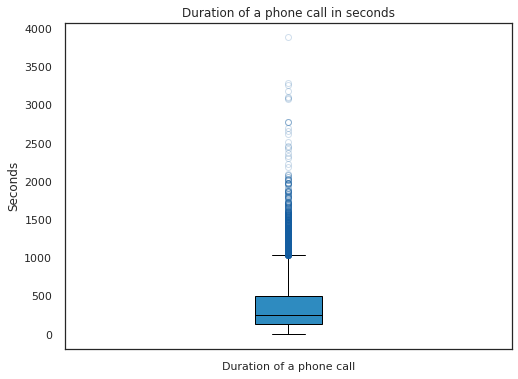

In [192]:
plt.figure(figsize=(8,6))
plt.boxplot(bank_data['duration'], 
            patch_artist=True, 
            boxprops=dict(facecolor='#2E8BC0', color='black'), 
            capprops=dict(color='black'), 
            whiskerprops=dict(color='black'), 
            flierprops=dict(markeredgecolor='#145DA0', alpha=0.2), 
            medianprops=dict(color='black'), 
            labels=['Duration of a phone call'])
plt.title('Duration of a phone call in seconds')
plt.ylabel('Seconds')
plt.show()

In [193]:
min_duration = bank_data['duration'].min()
bank_data['duration'] = pd.cut(bank_data['duration'], bins=[min_duration, 600, 1200, np.inf], labels=['<10mins', '10-20mins', '<20+mins'], include_lowest=True)

**CAMPAIGN**


```
Campaign shows number of contacts performed during this campaign and in the previous campaign if client was contacted. 
The continuous variable was transformed in three categorical variables of 
“1-3times if client was contacted 3 or less times, 4-6times if contact was made between 4 to 6 times, 
and finally +6 times if client was contacted more than 6 times A boxplot was plotted to check the distribution and outliers of variable campaign.
```



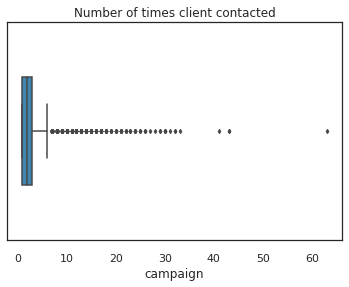

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='campaign', data=bank_data, color='#2E8BC0', fliersize=3, width=0.5)
plt.title('Number of times client contacted')
plt.show()


In [195]:
min_campaign = bank_data['campaign'].min()
bank_data['campaign'] = pd.cut(bank_data['campaign'], 
                         bins=[min_campaign, 3, 6, np.inf], 
                         labels=['1-3times', '4-6times', '+6times'], 
                         include_lowest=True)


- **PREVIOUS**
- **PDAYS**
- **MONTH**
```
The column ‘Previous’ shows the number of contacts performed before this campaign 
and ‘pdays’ shows number of days that passed by after the client was last contacted from a previous campaign. 
If ‘Previous’ = 0, this shows zero contact for the client and corresponds with -1 for ‘Pdays’ which shows client was not previously contacted. 
For this reason, the column pdays was discarded and previous column was transformed into two categories of PriorContact if client was contacted from a previous campaign and NoPriorContact if no contact was made.
```


```
Column attributes pdays, days and month were discarded from our data set for association rule. 
This is because these columns highly affect our output target. 
For this reason, the variables were discarded in order to have a realistic predictive model. Character variables in the data set where converted into factors to apply association rule.
```





In [196]:
bank_data['previous'] = pd.cut(bank_data['previous'], bins=[-float("inf"), 0, float("inf")], labels=['NoPriorContact', 'PriorContact'])

In [197]:
bank_data = bank_data.drop(columns=['pdays', 'month', 'day'])
bd_test = bank_data.apply(lambda x: pd.factorize(x)[0])

In [229]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
0,senior_age,admin.,married,secondary,default=no,0-$4000,housing=yes,loan=no,unknown,10-20mins,1-3times,NoPriorContact,unknown,deposit=yes
1,senior_age,admin.,married,secondary,default=no,0-$4000,housing=no,loan=no,unknown,<20+mins,1-3times,NoPriorContact,unknown,deposit=yes
2,middle_aged_adult,technician,married,secondary,default=no,0-$4000,housing=yes,loan=no,unknown,<20+mins,1-3times,NoPriorContact,unknown,deposit=yes
3,senior_age,services,married,secondary,default=no,0-$4000,housing=yes,loan=no,unknown,<10mins,1-3times,NoPriorContact,unknown,deposit=yes
4,senior_age,admin.,married,tertiary,default=no,0-$4000,housing=no,loan=no,unknown,10-20mins,1-3times,NoPriorContact,unknown,deposit=yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,young_adult,blue-collar,single,primary,default=no,0-$4000,housing=yes,loan=no,cellular,<10mins,1-3times,NoPriorContact,unknown,deposit=no
11158,middle_aged_adult,services,married,secondary,default=no,0-$4000,housing=no,loan=no,unknown,<10mins,4-6times,NoPriorContact,unknown,deposit=no
11159,young_adult,technician,single,secondary,default=no,0-$4000,housing=no,loan=no,cellular,<10mins,1-3times,NoPriorContact,unknown,deposit=no
11160,middle_aged_adult,technician,married,secondary,default=no,-veBal,housing=no,loan=yes,cellular,<10mins,1-3times,PriorContact,failure,deposit=no


In [198]:
bd_test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,2,0,0,0,0,0,0,0,2,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,2,5,1,2,0,0,0,0,1,2,0,0,0,1
11158,1,2,0,0,0,0,1,0,0,2,1,0,0,1
11159,2,1,1,0,0,0,1,0,1,2,0,0,0,1
11160,1,1,0,0,0,1,1,1,1,2,0,1,2,1


In [199]:
bd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   duration   11162 non-null  int64
 10  campaign   11162 non-null  int64
 11  previous   11162 non-null  int64
 12  poutcome   11162 non-null  int64
 13  deposit    11162 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


In [200]:
bd_test.describe()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,1.338111,3.536015,0.546855,0.732844,0.015051,0.324135,0.526877,0.130801,0.859165,1.648450,0.234367,0.254256,0.555994,0.526160
std,0.927241,2.780441,0.692478,0.855438,0.121761,0.642078,0.499299,0.337198,0.509616,0.738591,0.535865,0.435461,1.021124,0.499338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,11.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


###Rules

In [231]:
bank_data.astype(str)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,deposit
0,senior_age,admin.,married,secondary,default=no,0-$4000,housing=yes,loan=no,unknown,10-20mins,1-3times,NoPriorContact,unknown,deposit=yes
1,senior_age,admin.,married,secondary,default=no,0-$4000,housing=no,loan=no,unknown,<20+mins,1-3times,NoPriorContact,unknown,deposit=yes
2,middle_aged_adult,technician,married,secondary,default=no,0-$4000,housing=yes,loan=no,unknown,<20+mins,1-3times,NoPriorContact,unknown,deposit=yes
3,senior_age,services,married,secondary,default=no,0-$4000,housing=yes,loan=no,unknown,<10mins,1-3times,NoPriorContact,unknown,deposit=yes
4,senior_age,admin.,married,tertiary,default=no,0-$4000,housing=no,loan=no,unknown,10-20mins,1-3times,NoPriorContact,unknown,deposit=yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,young_adult,blue-collar,single,primary,default=no,0-$4000,housing=yes,loan=no,cellular,<10mins,1-3times,NoPriorContact,unknown,deposit=no
11158,middle_aged_adult,services,married,secondary,default=no,0-$4000,housing=no,loan=no,unknown,<10mins,4-6times,NoPriorContact,unknown,deposit=no
11159,young_adult,technician,single,secondary,default=no,0-$4000,housing=no,loan=no,cellular,<10mins,1-3times,NoPriorContact,unknown,deposit=no
11160,middle_aged_adult,technician,married,secondary,default=no,-veBal,housing=no,loan=yes,cellular,<10mins,1-3times,PriorContact,failure,deposit=no


##**Item Frequency**
Item Frequency shows the items in the dataset that appear most. As we can see that most clients in the data set have not defaulted in their loan obligations followed by loan=no which shows the number of Clients that have not accessed any loan facilities.

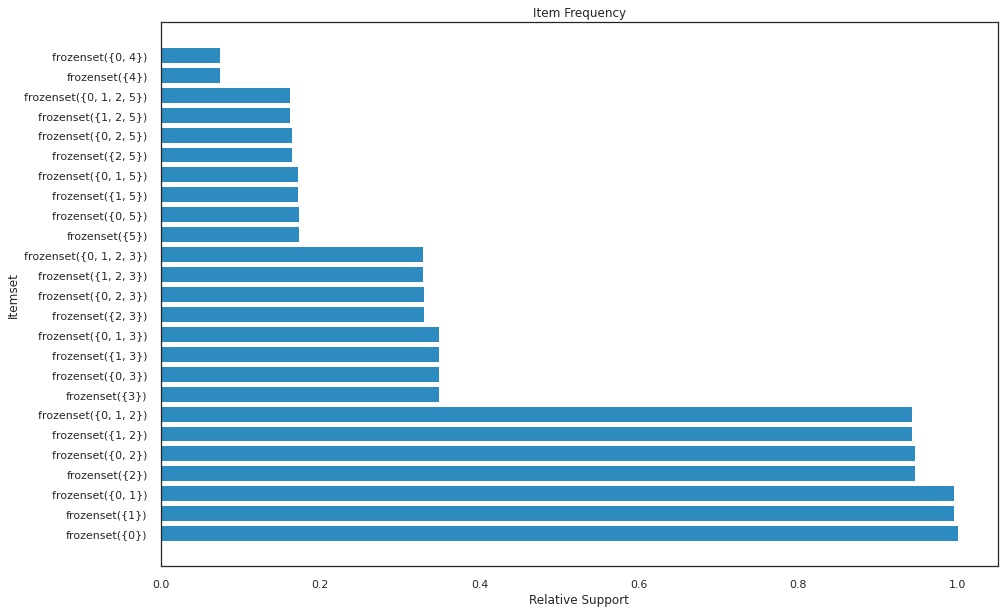

In [201]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
# Convert dataframe to list of transactions
transactions = bd_test.values.tolist()

# Encode transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Sort itemsets by frequency and plot top 25
plt.figure(figsize=(15, 10))
top_items = frequent_itemsets.nlargest(25, 'support')
plt.barh(top_items['itemsets'].astype(str), top_items['support'], color='#2E8BC0')
plt.title('Item Frequency')
plt.xlabel('Relative Support')
plt.ylabel('Itemset')
plt.show()

In [203]:
from mlxtend.frequent_patterns import apriori, association_rules

# assuming that bd_test is a pandas DataFrame
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True, max_len=5)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


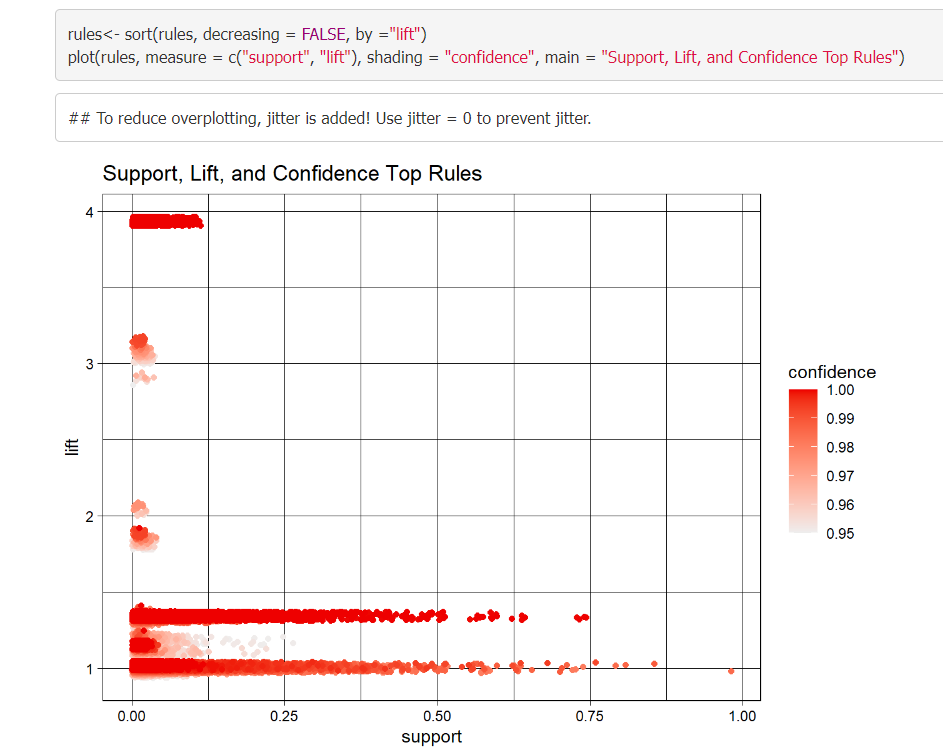

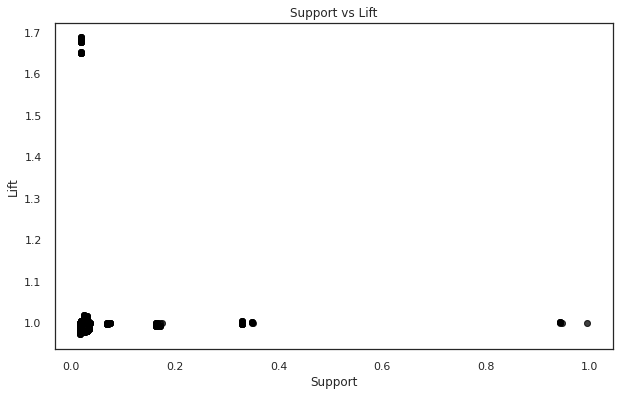

In [208]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
rules = association_rules(apriori(df, min_support=0.01, use_colnames=True, max_len=5), metric="lift", min_threshold=0.95)
rules = rules.sort_values(['lift'], ascending=[True])
plt.figure(figsize=(10,6))
plt.scatter(rules["support"], rules["lift"], alpha=0.5, color='black')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

In [210]:
general_rules_20 = rules[:20].sort_values('lift')
print(general_rules_20[:10].to_string(index=False))

antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction
  (0, 1, 2)      (3, 5)            0.942663            0.018276 0.016753    0.017772 0.972423 -0.000475    0.999487
     (1, 2)      (3, 5)            0.942663            0.018276 0.016753    0.017772 0.972423 -0.000475    0.999487
     (1, 2)   (0, 3, 5)            0.942663            0.018276 0.016753    0.017772 0.972423 -0.000475    0.999487
     (3, 5)   (0, 1, 2)            0.018276            0.942663 0.016753    0.916667 0.972423 -0.000475    0.688049
  (0, 3, 5)      (1, 2)            0.018276            0.942663 0.016753    0.916667 0.972423 -0.000475    0.688049
     (3, 5)      (1, 2)            0.018276            0.942663 0.016753    0.916667 0.972423 -0.000475    0.688049
     (1, 2)      (0, 7)            0.942663            0.029385 0.027056    0.028702 0.976735 -0.000644    0.999296
     (1, 2)         (7)            0.942663            0.029385 0.027056

In [212]:
pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.7 MB/s eta 0:00:00


In [224]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pyvis.network import Network

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True, max_len=5)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

general_rules20 = rules.nlargest(20, "lift")
general_rules20_str = general_rules20.astype(str)
edges = general_rules20_str.apply(lambda x: (x["antecedents"], x["consequents"], x["lift"]), axis=1)
nodes = set(general_rules20_str["antecedents"]).union(set(general_rules20_str["consequents"]))
g = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook=True)
g.barnes_hut()
g.add_nodes(nodes)
for e in edges:
    g.add_edge(e[0], e[1], value=e[2])
    neighbor_map = g.get_adj_list()
g.show("my_graph.html")


my_graph.html


In [225]:
from IPython.display import IFrame
IFrame(src='./my_graph.html', width=700, height=600)